In [1]:
import gcsfs
import os.path as op

In [2]:
fs = gcsfs.GCSFileSystem(project='learning-2-learn-221016')

In [3]:
metadata_file = '2017_5_04_raw.json'
if not op.exists(metadata_file):
    fs.get(op.join('learning2learn/Buffalo/NWB-experiments/', metadata_file), metadata_file)

In [4]:
import json
from hdf5zarr import NWBZARRHDF5IO, HDF5Zarr

# import metadata from a json file
with open(metadata_file, 'r') as mfile:
    store = json.load(mfile)

f = fs.open('learning2learn/Buffalo/NWB-experiments/2017_5_04_raw.nwb', 'rb')

hdf5_zarr = HDF5Zarr(f, store = store, store_mode = 'r')
zgroup = hdf5_zarr.zgroup
io = NWBZARRHDF5IO(mode='r', file=zgroup, load_namespaces=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/hdmf/spec/namespace.py:470: UserWarning: ignoring namespace 'hdmf-common' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])
/srv/conda/envs/notebook/lib/python3.7/site-packages/hdmf/spec/namespace.py:470: UserWarning: ignoring namespace 'core' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])


In [5]:
print(zgroup.tree())

/
 ├── acquisition
 │   └── ElectricalSeries
 │       ├── data (275057279, 124) int16
 │       ├── electrodes (124,) int64
 │       └── starting_time () float64
 ├── analysis
 ├── file_create_date (1,) object
 ├── general
 │   ├── devices
 │   │   └── Device
 │   ├── experimenter (1,) object
 │   ├── extracellular_ephys
 │   │   ├── ElectrodeGroup
 │   │   │   └── device
 │   │   │       └── .link
 │   │   └── electrodes
 │   │       ├── filtering (124,) object
 │   │       ├── group (124,) uint64
 │   │       ├── group_name (124,) object
 │   │       ├── id (124,) int64
 │   │       ├── imp (124,) float64
 │   │       ├── label (124,) object
 │   │       ├── location (124,) object
 │   │       ├── x (124,) float64
 │   │       ├── y (124,) float64
 │   │       └── z (124,) float64
 │   ├── institution () object
 │   ├── keywords (3,) object
 │   ├── lab () object
 │   ├── notes () object
 │   └── source_script () object
 ├── identifier () object
 ├── processing
 ├── session_descriptio

In [6]:
data = zgroup['acquisition/ElectricalSeries/data']

In [7]:
import matplotlib.pyplot as plt

In [8]:
import dask.array as da

In [9]:
arr = da.from_zarr(data)

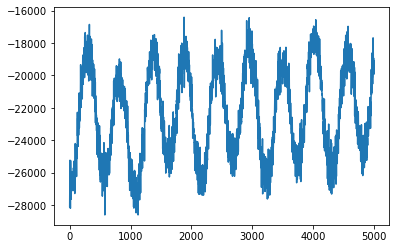

In [10]:
plt.plot(arr[:5000, 0])

In [11]:
from tools import init_cluster

In [12]:
cluster, client = init_cluster()

In [13]:
cluster

In [14]:
arr.persist()

,Array,Chunk
Bytes,68.21 GB,537.22 kB
Shape,"(275057279, 124)","(268611, 1)"
Count,126976 Tasks,126976 Chunks
Type,int16,numpy.ndarray


In [15]:
from neurodsp.timefrequency import compute_wavelet_transform

In [16]:
compute_wavelet_transform?

Signature: compute_wavelet_transform(sig, fs, freqs, n_cycles=7, scaling=0.5)
Docstring:
Compute the time-frequency representation of a signal using morlet wavelets.

Parameters
----------
sig : 1d array
    Time series.
fs : float
    Sampling rate, in Hz.
freqs : 1d array or list of float
    If array, frequency values to estimate with morlet wavelets.
    If list, define the frequency range, as [freq_start, freq_stop, freq_step].
    The `freq_step` is optional, and defaults to 1. Range is inclusive of `freq_stop` value.
n_cycles : float
    Length of the filter, as the number of cycles for each frequency.
scaling : float
    Scaling factor.

Returns
-------
mwt : 2d array
    Time frequency representation of the input signal.
File:      /srv/conda/envs/notebook/lib/python3.7/site-packages/neurodsp/timefrequency/wavelets.py
Type:      function


In [17]:
import numpy as np

In [18]:
# pp = da.map_blocks(compute_wavelet_transform, arr.T, **dict(fs=1000, freqs=[100]), dtype=np.int16)

In [19]:
from dask.diagnostics import ProgressBar

# with ProgressBar():
#     result = pp.compute()

In [20]:
from dask_ml.decomposition import PCA

In [21]:
my_pca = PCA(n_components=3)

In [22]:
arr.shape

(275057279, 124)

In [23]:
my_pca.fit(arr)

CancelledError: 